# Inaugural Project

# Imports

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We illustrate set C within an Edgeworth box.

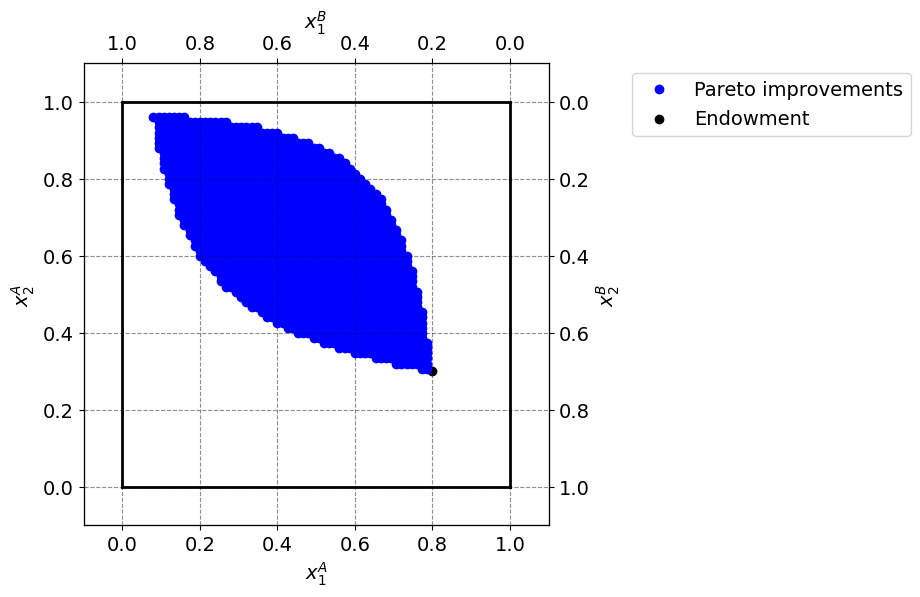

In [30]:
# We import the exchange economy
from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

par = model.par

# total endowment
w1bar = 1.0
w2bar = 1.0

# figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# We define set C and plot the combinations of x1A and x2A
def set_C(x1A, x2A):
    return model.utility_A(x1A, x2A) >= model.utility_A(model.par.w1A, model.par.w2A) and \
           model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)

N = 75
allocations = np.linspace(0, 1, N + 1)

for x1A in allocations:
    for x2A in allocations:
        if set_C(x1A, x2A):
            plt.plot(x1A, x2A, 'bo') 

# figure settings
plt.plot([], [], 'bo', label='Pareto improvements')

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='o',color='black',label='Endowment')
ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));


The combinations that are a pareto improvement are located to the north-west of the initial endowment.

# Question 2

We run through the prices between 0.5 and 2.5 in a loop to check the deviations from market clearing for good 1 and 2.

In [31]:
# We define the range of p1
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

errors_1 = []
errors_2 = []

# We calculate the deviations
for p1 in p1_range:
    eps1, eps2 = model.check_market_clearing(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5267, ε1 = 0.4759, ε2 = -0.2507
p1 = 0.5533, ε1 = 0.4241, ε2 = -0.2347
p1 = 0.5800, ε1 = 0.3770, ε2 = -0.2187
p1 = 0.6067, ε1 = 0.3341, ε2 = -0.2027
p1 = 0.6333, ε1 = 0.2947, ε2 = -0.1867
p1 = 0.6600, ε1 = 0.2586, ε2 = -0.1707
p1 = 0.6867, ε1 = 0.2252, ε2 = -0.1547
p1 = 0.7133, ε1 = 0.1944, ε2 = -0.1387
p1 = 0.7400, ε1 = 0.1658, ε2 = -0.1227
p1 = 0.7667, ε1 = 0.1391, ε2 = -0.1067
p1 = 0.7933, ε1 = 0.1143, ε2 = -0.0907
p1 = 0.8200, ε1 = 0.0911, ε2 = -0.0747
p1 = 0.8467, ε1 = 0.0693, ε2 = -0.0587
p1 = 0.8733, ε1 = 0.0489, ε2 = -0.0427
p1 = 0.9000, ε1 = 0.0296, ε2 = -0.0267
p1 = 0.9267, ε1 = 0.0115, ε2 = -0.0107
p1 = 0.9533, ε1 = -0.0056, ε2 = 0.0053
p1 = 0.9800, ε1 = -0.0218, ε2 = 0.0213
p1 = 1.0067, ε1 = -0.0371, ε2 = 0.0373
p1 = 1.0333, ε1 = -0.0516, ε2 = 0.0533
p1 = 1.0600, ε1 = -0.0654, ε2 = 0.0693
p1 = 1.0867, ε1 = -0.0785, ε2 = 0.0853
p1 = 1.1133, ε1 = -0.0910, ε2 = 0.1013
p1 = 1.1400, ε1 = -0.1029,

# Question 3

We create a function that is the error in the markets clearings conditions substracted from each other which is equal to 0 when both markets clear. To solve the equation we use a root finder that find the market clearing price for p1 such that there are no error in the market clearing.

In [32]:
p1_guess = 1
solution = optimize.root(model.market_clearing_price, p1_guess) 

print(f"The market clearing price for p1 is {solution.x[0]:.4f}")

The market clearing price for p1 is 0.9444


In [33]:
Allocation = model.demand_A(solution.x[0])
print(f"The corresponding allocation for A is ({Allocation[0]:.4f},{Allocation[1]:.4f})")

The corresponding allocation for A is (0.3725,0.7037)


# Question 4a

We find the corresponding allocations to the prices and use argmax to find the price with highest utility for A.

In [34]:
# We calculate the utilities
a_utility = []

for p1 in p1_range:
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)
    a_utility.append(((1 - x1B) ** par.alpha) * ((1 - x2B) ** par.beta))

# we maximize the utility for A
max_utility_index = np.argmax(a_utility)

optimal_price = p1_range[max_utility_index]
x1B_optimal, x2B_optimal = model.demand_B(optimal_price)
optimal_allocation_A = [1 - x1B_optimal, 1 - x2B_optimal]

print(f"The price that maximizes utility for A is {optimal_price:.3f}")
print(f"and the allocation for A is then", optimal_allocation_A)

The price that maximizes utility for A is 1.887
and the allocation for A is then [0.619316843345112, 0.640888888888889]


# Question 4b

In [35]:
def find_best_price_and_allocation_for_A(self):
    # Define a function that calculates the negative utility of A (since we want to maximize utility)
    def negative_utility_A(p1):
        x1B, x2B = self.demand_B(p1)
        x1B = np.clip(x1B, 0, 1)
        x2B = np.clip(x2B, 0, 1)
        return -(((1 - x1B) ** self.par.alpha) * ((1 - x2B) ** self.par.beta))

    # Use the minimize function to find the price that maximizes A's utility
    result = minimize(negative_utility_A, 1.0, bounds=[(0.01, None)])

    optimal_price = result.x[0]

    # Calculate the demand for B at the optimal price
    x1B_optimal, x2B_optimal = self.demand_B(optimal_price)

    # Calculate the allocation for A as the total amount of each good (1) minus the allocation for B
    optimal_allocation_A = [1 - x1B_optimal, 1 - x2B_optimal]

    return optimal_price, optimal_allocation_A

print(find_best_price_and_allocation_for_A(model))

(1.8992870167640619, [0.6209604292482923, 0.6400475322157293])


# Question 5a

We create a loop which finds the highest utility for A for all allocations in set C.

In [36]:
# Initialize the maximum utility and the optimal allocation
max_utility = -np.inf
optimal_allocation = None

for x1A in allocations:
    for x2A in allocations:
        if set_C(x1A, x2A):
            # Calculate A's utility at this allocation
            utility = model.utility_A(x1A, x2A)
            
            # If this utility is higher than the current maximum, update the maximum utility and the optimal allocation
            if utility > max_utility:
                max_utility = utility
                optimal_allocation = (x1A, x2A)

print(f"The allocation that maximizes A's utility is ({optimal_allocation[0]:.3f}, {optimal_allocation[1]:.3f})")
print(f"The maximum utility for A is {max_utility:.3f}")

The allocation that maximizes A's utility is (0.560, 0.853)
The maximum utility for A is 0.742


# Question 5b

We maximize the utility of A but such that B is not worse of than in the initial endowment.

In [37]:
# Initialize the maximum utility and the optimal allocation
max_utility = -np.inf
optimal_allocations = None

endowment_utility_B = model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
allocations = np.clip(allocations, 0, 1)

for x1A in allocations:
    for x2A in allocations:
        # Calculate B's utility at this allocation
        utility_B = model.utility_B(1 - x1A, 1 - x2A)
        
        # Check if B's utility is equal or larger than B's utility at the endowment point
        if utility_B >= endowment_utility_B:
            # Calculate A's utility at this allocation
            utility_A = model.utility_A(x1A, x2A)
            
            # If this utility is higher than the current maximum, update the maximum utility and the optimal allocation
            if utility_A > max_utility:
                max_utility = utility_A
                optimal_allocations = (x1A, x2A)

print(f"The allocation that maximizes A's utility is ({optimal_allocations[0]:.3f}, {optimal_allocations[1]:.3f})")
print(f"The maximum utility for A is {max_utility:.3f}")

The allocation that maximizes A's utility is (0.560, 0.853)
The maximum utility for A is 0.742


# Question 6a

We maximize the social planners problem.

In [38]:
# We define the social planners problem
def neg_utility_to_maximize(x):
    xA1, xA2 = x
    return -(model.utility_A(xA1, xA2) + model.utility_B(1 - xA1, 1 - xA2))

bounds = [(0, 1), (0, 1)]

# We maximize by minimizing the negative utility
res = minimize(neg_utility_to_maximize, x0=[0.5, 0.5], bounds=bounds, method='Nelder-Mead')

optimal_allocation_A = res.x
optimal_allocation_B = [1 - optimal_allocation_A[0], 1 - optimal_allocation_A[1]]

print(f"The optimal allocation for A is ({optimal_allocation_A[0]:.3f}, {optimal_allocation_A[1]:.3f})")
print(f"The optimal allocation for B is ({optimal_allocation_B[0]:.3f}, {optimal_allocation_B[1]:.3f})")

The optimal allocation for A is (0.333, 0.667)
The optimal allocation for B is (0.667, 0.333)


# Question 6b

We create an edgeworth box with the allocations found in question 3-5.

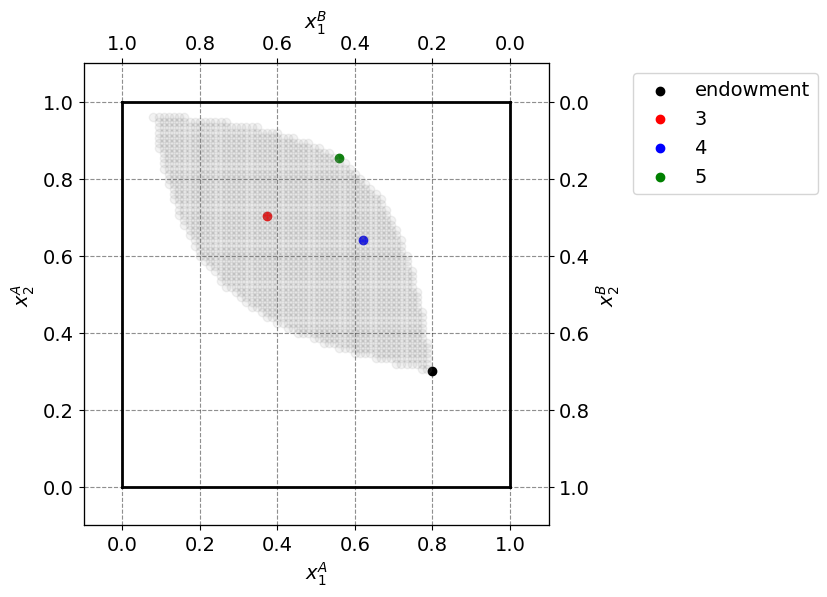

In [39]:
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

N = 75
allocations = np.linspace(0, 1, N + 1)

for x1A in allocations:
    for x2A in allocations:
        if set_C(x1A, x2A):
            plt.plot(x1A, x2A, 'o', color='grey', alpha=0.1) 

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We plot our different allocations
ax_A.scatter(par.w1A,par.w2A,marker='o',color='black',label='endowment')
ax_A.scatter(0.373,0.704,marker='o',color='red',label='3')
ax_A.scatter(0.621,0.640,marker='o',color='blue',label='4')
ax_A.scatter(0.560,0.853,marker='o',color='green',label='5')

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 7

We generate a set W with 50 random endowments from an uniform distribution.

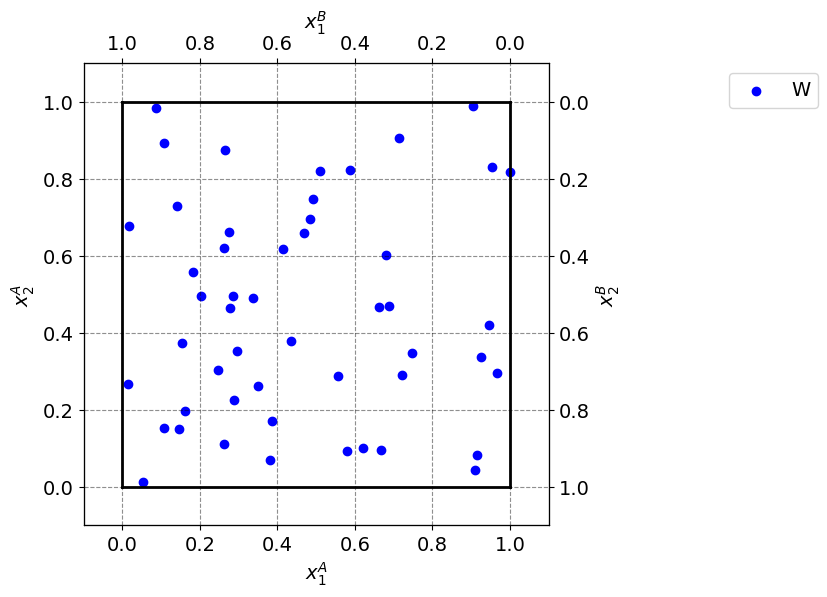

In [40]:
np.random.seed(69420666)
num_elements = 50
W = np.random.rand(num_elements, 2)

# we create an edgeworth box and illustrate the endowments
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.scatter(W[:,0], W[:,1], marker='o', color='blue', label='W')

# figure settings
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

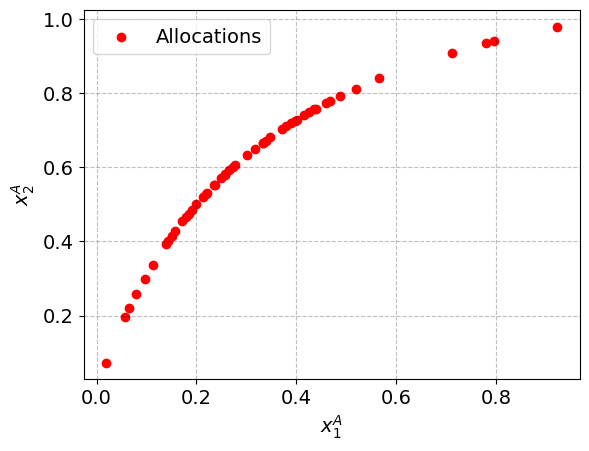

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy.optimize import brentq

class ExchangeEconomyClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3

    def utility_A(self,x1A,x2A):
        par = self.par
        return (x1A ** par.alpha) * (x2A ** par.beta)

    def utility_B(self,x1B,x2B):
        par = self.par
        return (x1B ** par.beta) * (x2B ** par.alpha)

    def demand_A(self,p1):
        par = self.par
        return par.alpha * ( par.w1A + par.w2A / p1), par.beta * (p1 * par.w1A + par.w2A)

    def demand_B(self,p1):
        par = self.par
        return par.beta * (( 1 - par.w1A) +  (1 - par.w2A ) / p1), par.alpha * (p1 * (1 - par.w1A) + (1 - par.w2A))

    def check_market_clearing(self,p1):

        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        eps1 = x1A-par.w1A + x1B-(1-par.w1A)
        eps2 = x2A-par.w2A + x2B-(1-par.w2A)

        return eps1,eps2

    def market_clearing_price(self, p1):
        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        mk_clear = x1A-par.w1A + x1B-(1-par.w1A)-(x2A-par.w2A + x2B-(1-par.w2A))

        return mk_clear

    def find_allocation(self, w1A, w2A):
        self.par.w1A = w1A
        self.par.w2A = w2A
        p1 = brentq(self.market_clearing_price, 0.01, 10)
        x1A, x2A = self.demand_A(p1)
        return x1A, x2A

economy = ExchangeEconomyClass()

# Find the market equilibrium allocation for each ωA ∈W
allocations = np.array([economy.find_allocation(w1A, w2A) for w1A, w2A in W])

# Create a new figure
plt.figure()

# Plot the allocations
plt.scatter(allocations[:,0], allocations[:,1], marker='o', color='red', label='Allocations')

# Add labels and legend
plt.xlabel("$x_1^A$")
plt.ylabel("$x_2^A$")
plt.legend()

# Display the plot
plt.show()

# Question 8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


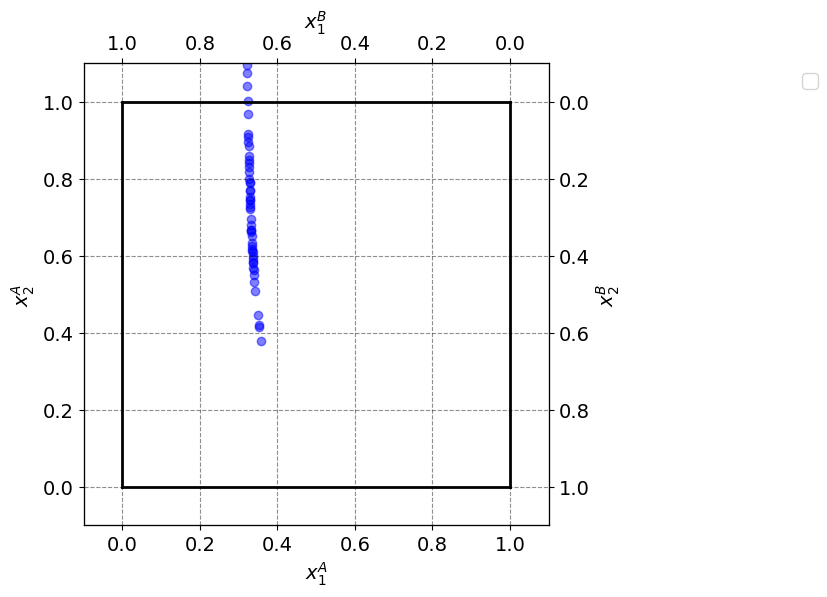

In [42]:
p1_values = []

for w in W:
    model.par.w1A, model.par.w2A = w
    solution = optimize.root(model.market_clearing_price, p1_guess)
    p1_values.append(solution.x[0])

allocations_A = []

for p1 in p1_values:
    x1A, x2A = model.demand_A(p1)
    allocations_A.append((x1A, x2A))

fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Unpack the allocations into separate lists for x1A and x2A
x1A_values, x2A_values = zip(*allocations_A)

# Plot the allocations for A
ax_A.scatter(x1A_values, x2A_values, color='blue', alpha=0.5)

# Rest of your code...

# figure settings
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()